# THE SPARKS FOUNDATION


* TASK 1 - Prediction using Supervised ML
        To Predict the percentage of marks of the students based on the number of hours they studied

### Author - Rohan Lunawat



In [17]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [18]:
# Reading the Data 
rawdata = pd.read_csv('http://bit.ly/w-data')
rawdata.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:>

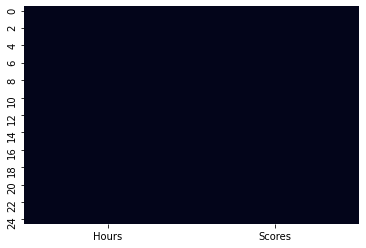

In [19]:
# Check if there any null value in the Dataset
sns.heatmap(rawdata.isnull() , cbar = False) 

The following heatmap indicates that there are no null values in our datset. Hence we can pwerform further analysis.

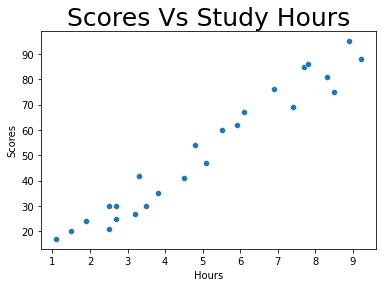

In [20]:

sns.scatterplot(y= rawdata['Scores'], x= rawdata['Hours'])
plt.title('Scores Vs Study Hours',size=25)
plt.ylabel('Scores', size=10)
plt.xlabel('Hours', size=10)
plt.show()

The above scatter plot indicates a positive correlation between the number of hours studied and the marks obtained. Lets plot a regression line to confirm the correlation.

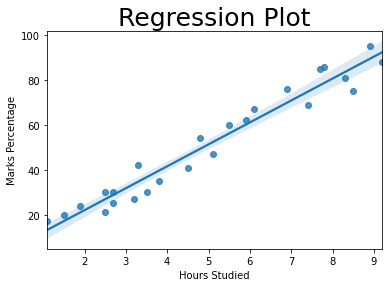

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [21]:

sns.regplot(x= rawdata['Hours'], y= rawdata['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())

A positive correlation is confirmed by the regression line.

## Training the model 

### Spliting the data

In [23]:

# Defining X and y from the Data
X = rawdata.iloc[:, :-1].values  
y = rawdata.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Fitting the data into the model

In [24]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

## Predicting the Percentage of Marks

In [25]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [27]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Plotting Predicted Marks with the Actual Marks

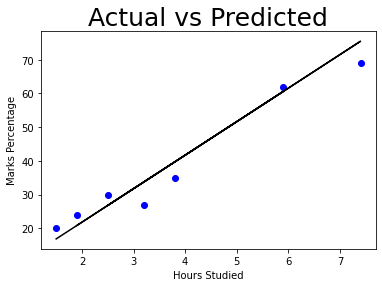

In [28]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

## Model Evaluation

In [31]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


As the value of the mean absolute error is small, the model can be considered significant for prediction

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?


In [34]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
